# NetFlix Stock Prices - EDA
### _when did Customers start going crazy with **Binge Watching**?_ :D

### Import neccessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'D:\GitHub_Projects\stockprice_prediction\datasets\NFLX(2002-2020)_m.csv') # converted to raw string to avoid "SyntaxError: (unicode error)"
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-06-01,1.080000,1.232143,0.842143,0.999286,0.999286,74190200
1,2002-07-01,1.000000,1.299286,0.850000,0.953571,0.953571,73610600
2,2002-08-01,0.950000,0.999286,0.706429,0.936429,0.936429,64883000
3,2002-09-01,0.936429,0.976429,0.689286,0.692857,0.692857,55749400
4,2002-10-01,0.709286,0.735714,0.346429,0.640714,0.640714,169148000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       225 non-null    object 
 1   Open       225 non-null    float64
 2   High       225 non-null    float64
 3   Low        225 non-null    float64
 4   Close      225 non-null    float64
 5   Adj Close  225 non-null    float64
 6   Volume     225 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


In [5]:
# convert date dtype from 'object' to 'datetime' -->Make a Package(NTS)
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       225 non-null    datetime64[ns]
 1   Open       225 non-null    float64       
 2   High       225 non-null    float64       
 3   Low        225 non-null    float64       
 4   Close      225 non-null    float64       
 5   Adj Close  225 non-null    float64       
 6   Volume     225 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 12.4 KB


In [6]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-06-01,1.080000,1.232143,0.842143,0.999286,0.999286,74190200
2002-07-01,1.000000,1.299286,0.850000,0.953571,0.953571,73610600
2002-08-01,0.950000,0.999286,0.706429,0.936429,0.936429,64883000
2002-09-01,0.936429,0.976429,0.689286,0.692857,0.692857,55749400
2002-10-01,0.709286,0.735714,0.346429,0.640714,0.640714,169148000


In [7]:
df.groupby(pd.Grouper(freq='Y')).mean() # average yearly performance (looks surprising at 2018!)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-12-31,0.863878,0.995918,0.667449,0.826327,0.826327,9.066420e+07
2003-12-31,1.979405,2.460060,1.728869,2.235655,2.235655,3.546684e+08
2004-12-31,3.593810,4.088512,2.851369,3.363750,3.363750,5.043630e+08
2005-12-31,2.473452,2.910476,2.294762,2.647857,2.647857,2.233731e+08
2006-12-31,3.758214,4.073572,3.355119,3.740238,3.740238,1.969440e+08
2007-12-31,3.147738,3.495476,2.830952,3.139048,3.139048,2.363661e+08
2008-12-31,4.121429,4.709405,3.580238,4.167024,4.167024,2.334012e+08
2009-12-31,6.119762,6.923095,5.745119,6.455714,6.455714,2.420000e+08
2010-12-31,16.098215,19.104286,14.898214,17.454048,17.454048,5.939033e+08


In [9]:
# Identify spiking values across all columns -->Make a Package(NTS)

cols = ['Open', 'Close', 'High', 'Volume']
spikes = ['open_spike', 'close_spike', 'high_spike', 'volume_spike'] # spike labels
spike_index = []
spike_locator = lambda df, col: df.loc[df[col]==df[col].max()].index.to_list() # function for locating spikes

for col in cols:
    index = spike_locator(df, col)
    spike_index.append(index)

spike_indices = dict(zip(spikes, spike_index))
spike_indices


{'open_spike': [Timestamp('2021-01-01 00:00:00')],
 'close_spike': [Timestamp('2020-12-01 00:00:00')],
 'high_spike': [Timestamp('2021-01-01 00:00:00')],
 'volume_spike': [Timestamp('2012-01-01 00:00:00')]}

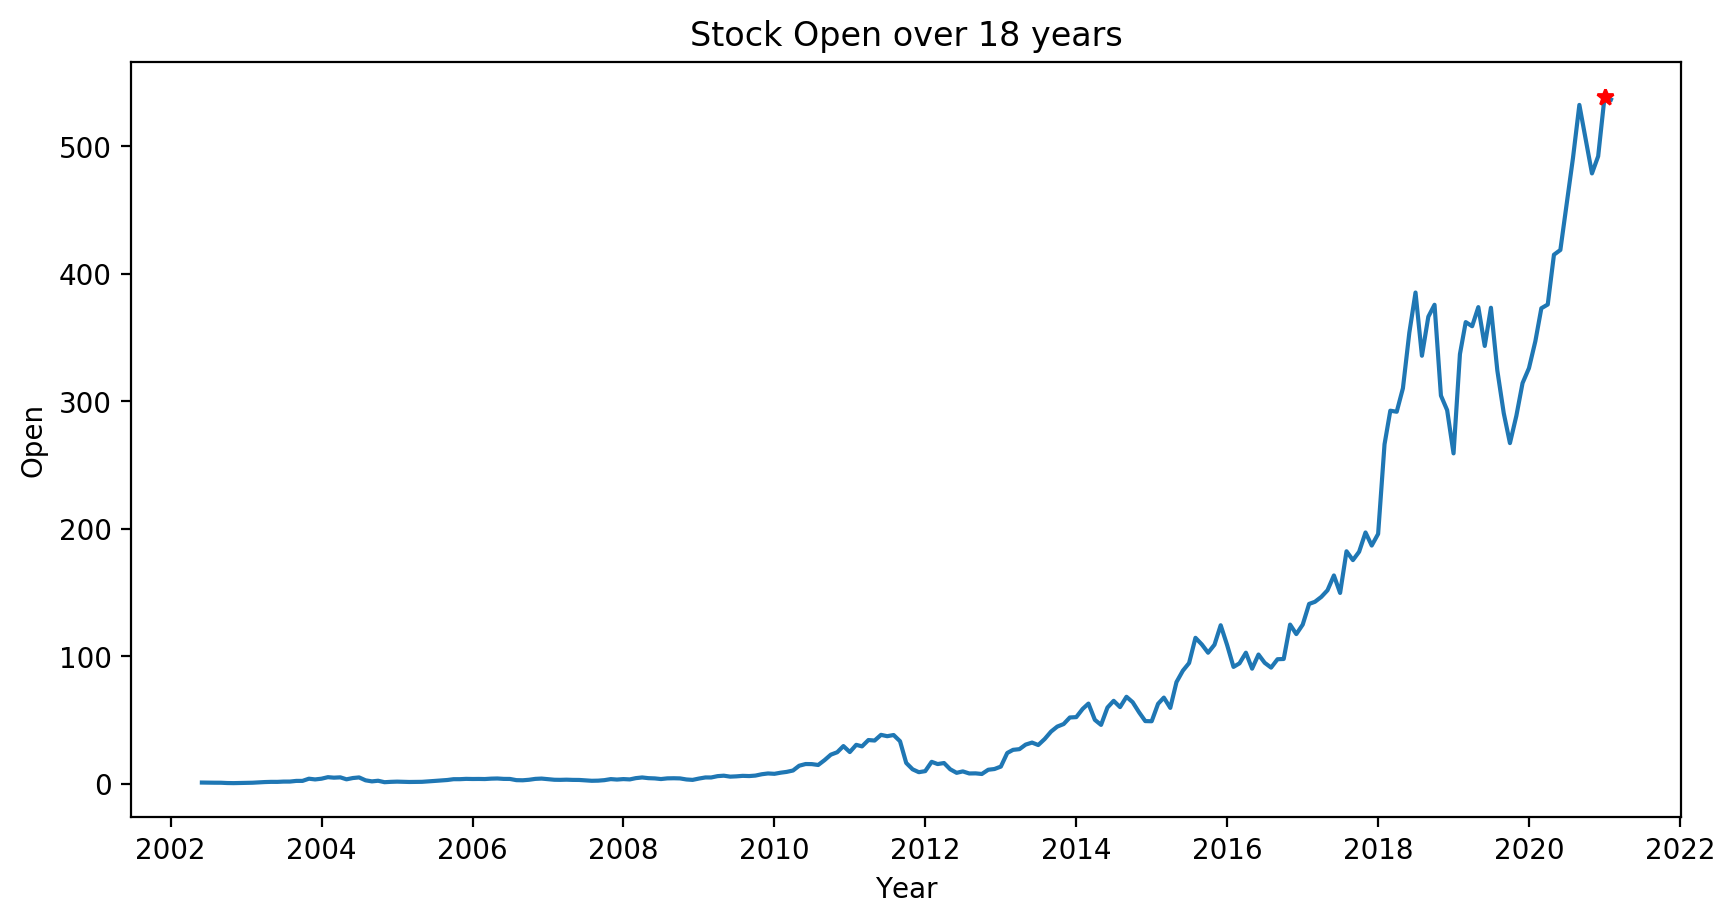

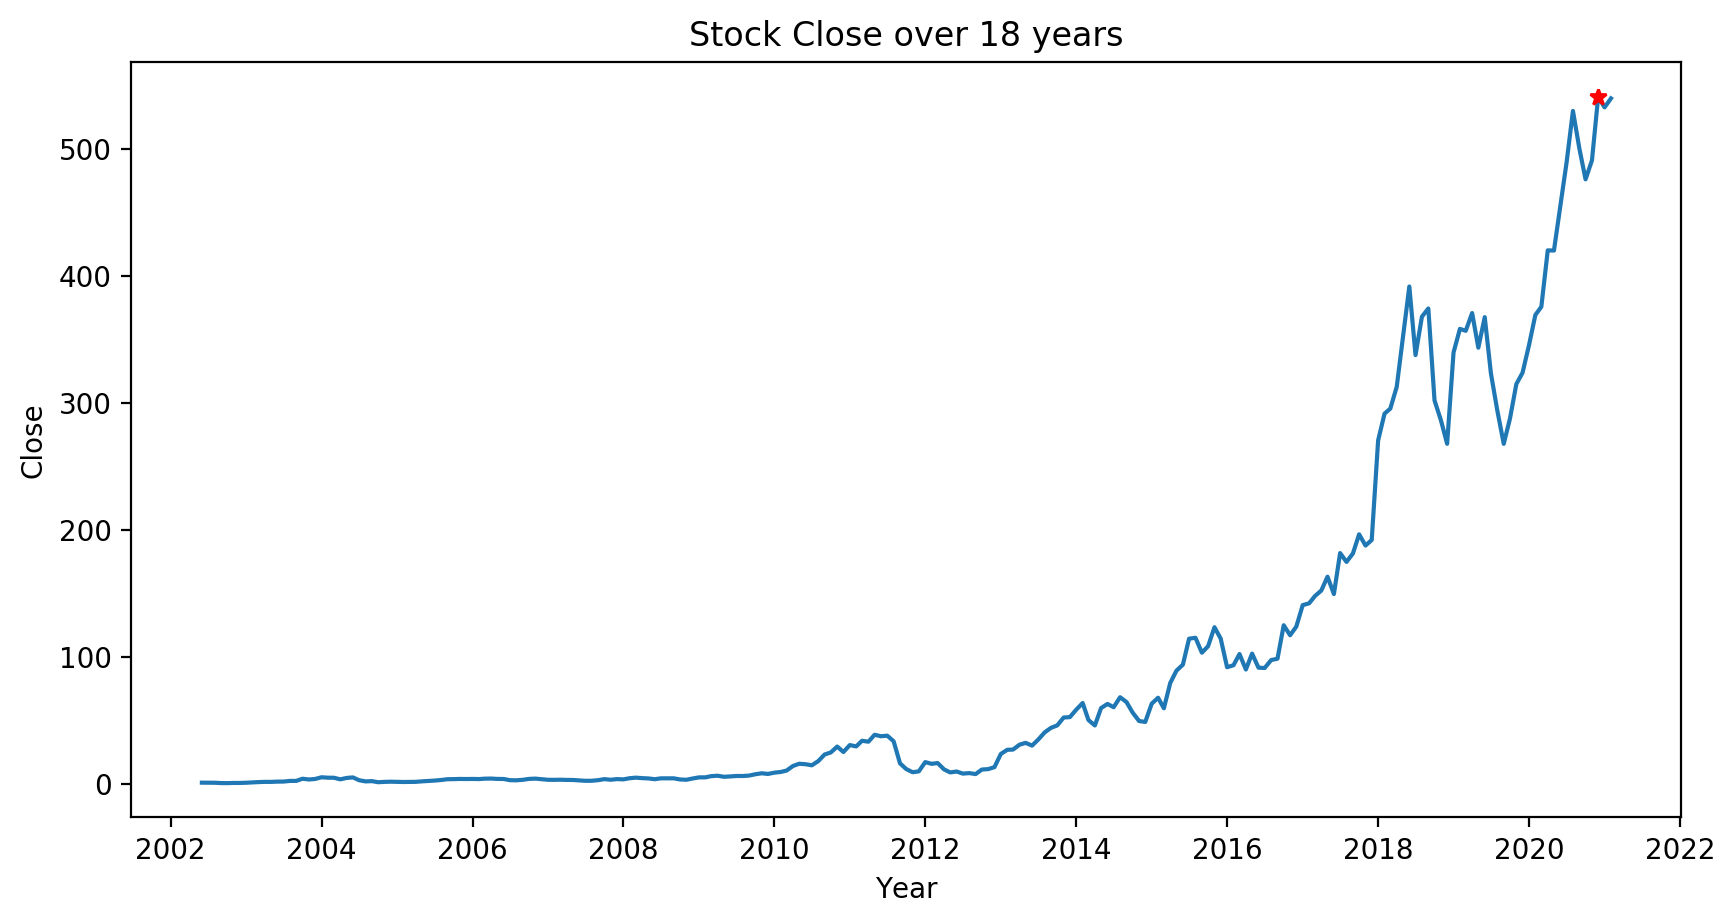

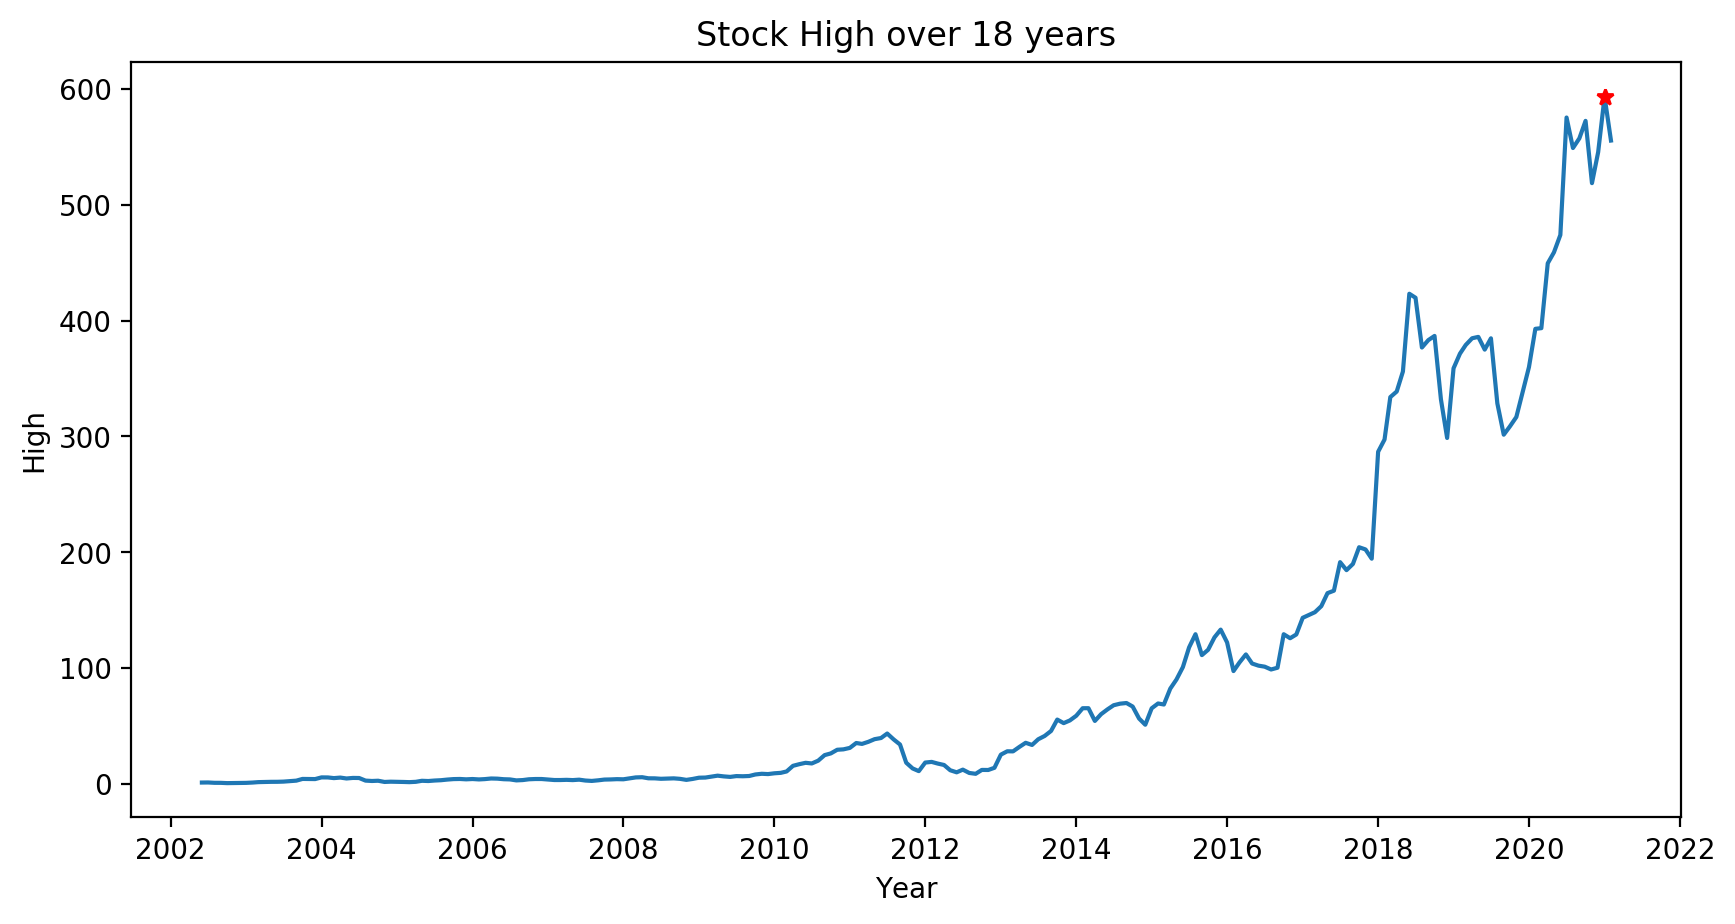

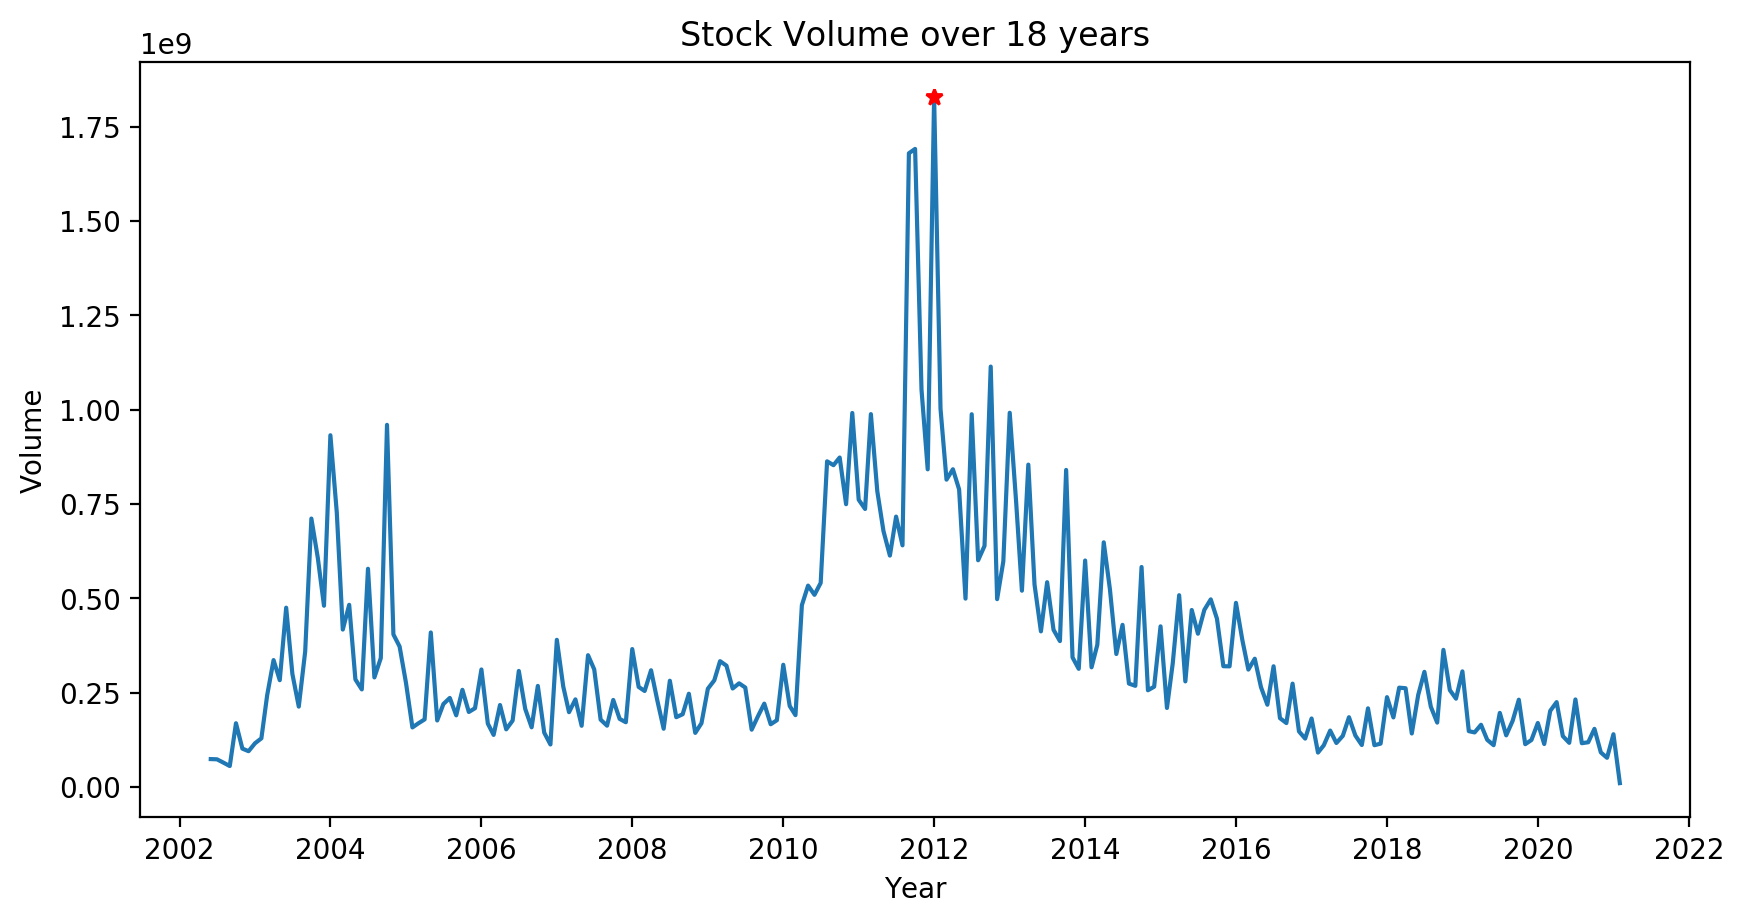

In [10]:
for col, spike in zip(cols, spike_indices):

    plt.figure(figsize=(10,5), dpi=200)
    plt.plot(df.index, df[col])
    plt.plot(spike_indices[spike], df[col].max(), 'r*')
    plt.xlabel('Year')
    plt.ylabel(col)
    plt.title(f'Stock {col} over 18 years')
    plt.show()

In [11]:
years = df.index.year
scale = lambda x: x/x.max()

scaled_df = df.iloc[:, 0:6].apply(scale, axis=0)
scaled_df['Year'] = [str(year) for year in years]
scaled_df.head()

,Open,High,Low,Close,Adj Close,Volume,Year
Date,,,,,,,
2002-06-01,0.002004,0.002077,0.001584,0.001848,0.001848,0.040556,2002
2002-07-01,0.001855,0.002190,0.001599,0.001763,0.001763,0.040239,2002
2002-08-01,0.001763,0.001684,0.001329,0.001732,0.001732,0.035468,2002
2002-09-01,0.001737,0.001646,0.001296,0.001281,0.001281,0.030475,2002
2002-10-01,0.001316,0.001240,0.000652,0.001185,0.001185,0.092465,2002


In [12]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225 entries, 2002-06-01 to 2021-02-01
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       225 non-null    float64
 1   High       225 non-null    float64
 2   Low        225 non-null    float64
 3   Close      225 non-null    float64
 4   Adj Close  225 non-null    float64
 5   Volume     225 non-null    float64
 6   Year       225 non-null    object 
dtypes: float64(6), object(1)
memory usage: 14.1+ KB


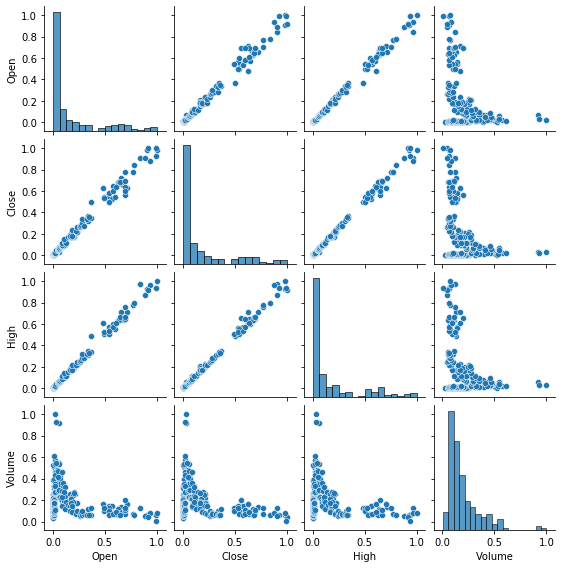

In [13]:
sns.pairplot(scaled_df[cols], height=2.0) # Relationship plot between Open, High, Close & Volume